In [1]:
import re 
import nltk # natural language tool kit
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Karim
[nltk_data]     Aboelazm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
true = pd.read_csv('C:\\Users\\Karim Aboelazm\\Desktop\\Fake_News\\fake\\src\\data\\True.csv')
fake = pd.read_csv('C:\\Users\\Karim Aboelazm\\Desktop\\Fake_News\\fake\\src\\data\\Fake.csv')

In [3]:
# true.head(3)
# fake.head(3)

In [4]:
# print(true.shape) # (21417, 4)
# print(fake.shape) # (23481, 4)

In [5]:
true['label'] = 1
fake['label'] = 0

In [6]:
frames = [true.loc[0:5000][:],fake.loc[0:5000][:]]
df = pd.concat(frames)
# print(df.shape) # (10002, 5)

In [7]:
df = df.sample(frac = 1).reset_index(drop=True)
# df.head()

In [8]:
X = df.drop('label',axis=1)

In [9]:
y = df['label']

In [10]:
df = df.dropna()

In [11]:
news = df.copy()

In [12]:
news.reset_index(inplace=True)

In [13]:
# news.head()

In [14]:
# print(news['title'][2])
# print("-----------------------------------------------------------")
# print(news['text'][2])

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0,len(news)):
    review = re.sub('[^a-zA-Z]',' ',news['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
len(corpus)

10002

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_v = TfidfVectorizer(max_features=5000,ngram_range=(1,3))

In [18]:
tfid_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [19]:
X = tfid_v.fit_transform(corpus).toarray()
y = news['label']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test =  train_test_split(X,y, test_size=0.2,random_state=0)

In [21]:
count_df = pd.DataFrame(X_train,columns=tfid_v.get_feature_names())
count_df.head(3)

,abandon,abc,abc news,abe,abil,abl,abort,abroad,absolut,absurd,...,york reuter,york time,york time report,young,young peopl,younger,youtub,zero,zink,zone
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.049864,0.059559,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.096539,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.linear_model import PassiveAggressiveClassifier as PAC
classifier = PAC(max_iter=1000)

In [23]:
from sklearn import metrics
import numpy as np 
import itertools
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)*100
print("Accuracy = %0.2f"% score ,"%")

Accuracy = 99.80 %


Un-NCM


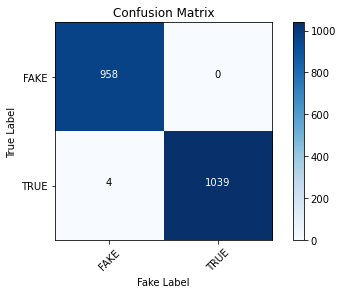

In [24]:
import matplotlib.pyplot as plt 
def plot_confusion_matrix(cm,classes,normaize=False,title= 'Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm , interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation = 45)
    plt.yticks(tick_marks,classes)
    if normaize:
        cm = cm.astype('float')/cm.sum(axis=1)[:np.newaxis]
        print("NCM")
    else:
        print("Un-NCM")
    
    threshold = cm.max()/2
    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",
        color="white" if cm[i,j]>threshold else "black")

    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Fake Label")

cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm , classes = ["FAKE", "TRUE"])

In [25]:
classifier.predict(X_test)

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [26]:
# review = re.sub('[^a-zA-Z]',' ',true['text'][16888])
# review = review.lower()
# review = review.split()
# review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
# review = ' '.join(review)
# review

In [27]:
val = tfid_v.transform([review]).toarray()

In [28]:
pd.DataFrame(val , columns=tfid_v.get_feature_names())

,abandon,abc,abc news,abe,abil,abl,abort,abroad,absolut,absurd,...,york reuter,york time,york time report,young,young peopl,younger,youtub,zero,zink,zone
0,0.0,0.0,0.0,0.0,0.0,0.048528,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
classifier.predict(val)

array([0], dtype=int64)